In [1]:
from sklearn import linear_model
import numpy as np 
import matplotlib.pyplot as plt

# randomly generate data 
N = 2 # number of training sample 
d = 2 # data dimension 
C = 3 # number of classes 

X = np.random.randn(d, N)
y = np.random.randint(0, 3, (N,))

In [2]:
# Ham softmax
def softmax(Z):
    return np.exp(Z)/ sum(np.exp(Z))

# phien ban on dinh hon cua softmax giup ham khong bi overflow: softmax_stable
def softmax_stable(Z):
    
    e_Z = np.exp(Z - np.max(Z, axis = 0, keepdims = True))
    A = e_Z / e_Z.sum(axis = 0)
    return A







In [3]:

## One-hot coding chuyển dữ liệu 1 số sang 1 vector 
from scipy import sparse 
def convert_labels(y, C = C):
       
    Y = sparse.coo_matrix((np.ones_like(y), (y, np.arange(len(y)))), shape = (C, len(y))).toarray()
    return Y 

Y = convert_labels(y, C)


In [4]:
# cost_function 
def cost(X, Y, W):
    A = softmax(W.T.dot(X))
    return -np.sum(Y*np.log(A))

W_init = np.random.randn(d, C)
# gradient: dao ham
def grad(X, Y, W):
    A = softmax((W.T.dot(X)))
    E = A - Y
    return X.dot(E.T)

# kiem tra dao ham
def numerical_grad(X, Y, W, cost):
    eps = 1e-6
    g = np.zeros_like(W)
    for i in range(W.shape[0]):
        for j in range(W.shape[1]):
            W_p = W.copy()
            W_n = W.copy()
            W_p[i, j] += eps 
            W_n[i, j] -= eps
            g[i,j] = (cost(X, Y, W_p) - cost(X, Y, W_n))/(2*eps)
    return g 

g1 = grad(X, Y, W_init)
g2 = numerical_grad(X, Y, W_init, cost)

print(np.linalg.norm(g1 - g2))
X

8.746066172287741e-10


array([[-0.95822211,  0.72078487],
       [ 0.76237529, -1.75445423]])

In [5]:
# Ham chinh softmax regression
def softmax_regression(X, y, W_init, eta, tol = 1e-4, max_count = 10000):
    W = [W_init]    
    C = W_init.shape[1]
    Y = convert_labels(y, C)
    N = X.shape[1]
    d = X.shape[0]
    
    count = 0
    check_w_after = 20
    while count < max_count:
        # mix data 
        mix_id = np.random.permutation(N)
        for i in mix_id:
            xi = X[:, i].reshape(d, 1)
            yi = Y[:, i].reshape(C, 1)
            ai = softmax(np.dot(W[-1].T, xi))
            W_new = W[-1] + eta*xi.dot((yi - ai).T)
            count += 1
            # stopping criteria
            if count%check_w_after == 0:                
                if np.linalg.norm(W_new - W[-check_w_after]) < tol:
                    return W
            W.append(W_new)
    return W
eta = .05 
d = X.shape[0]
W_init = np.random.randn(d, C)

W = softmax_regression(X, y, W_init, eta)
Y

array([[1, 0],
       [0, 0],
       [0, 1]])

In [6]:
def predict(W,X):
    A = softmax_stable(W.T.dot((X)))
    return np.argmax(A, axis =0)

[0 0 0 0 0 1 1 1 1 1]
[[1 1 1 1 1 0 0 0 0 0]
 [0 0 0 0 0 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 0]]


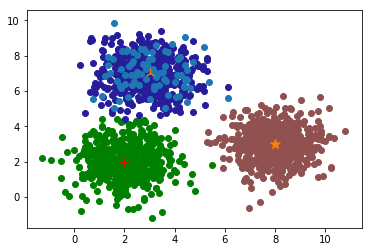

In [7]:
import random
from random import randint

means = np.array([[2, 2], [8, 3], [3, 7]])  # giá trị trung bình ( trung tâm xác suất)
cov = [[1, 0], [0, 1]] #
N = 500 #số dữ liệu 

new_N = randint(0,100)

k = randint(0,2)

X_new = np.random.multivariate_normal(means[k], cov, new_N)
# tạo ra ngẫu nhiên điểm dữ liệu xung quanh giá trị xác suất trung bình 
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

# nối các dữ liệu
X = np.concatenate((X0, X1, X2), axis = 0).T 

# nối thêm số 1 để chuyển hàm sang (Y = W.T * X)
X = np.concatenate((np.ones((1, 3*N)), X), axis = 0)
C = 3

# các label của class (0, 1, 2)
original_label = np.asarray([0]*N + [1]*N + [2]*N).T

# vẽ dữ liệu lên biểu đồ
plt.scatter(X0[:,0],X0[:,1],color = 'g')
plt.scatter(X1[:,0],X1[:,1], color = '#915151')
plt.scatter(X2[:,0],X2[:,1], color = '#251D9A')
#New X
plt.scatter(X_new[:,0],X_new[:,1])


plt.scatter(means[0,0], means[0,1],s = 99 ,marker = '+',color = 'r')
plt.scatter(means[1,0],means[1,1], s = 99,marker = '*')
plt.scatter(means[2,0],means[2,1], s = 99,marker = '2', color = '#E47E19')
a = convert_labels(original_label,C)
np.shape(a)
print(original_label[ 495:505])
print(a[:, 495:505])

In [8]:
W_init = np.random.randn(X.shape[0], C)
W = softmax_regression(X, original_label, W_init, eta)
print (W[-1])

[[ 6.99406053 -4.23934764 -4.69601542]
 [-1.77466718  0.65635278 -1.67119022]
 [-1.78085518 -1.81396898  0.93886957]]


In [9]:
#Visualize 
# x_min, x_max = X[:, 1].min() - .5, X[:, 1].max() + .5
# y_min, y_max = X[:, 2].min() - .5, X[:, 2].max() + .5
# x_min, x_max = -4, 14
# y_min, y_max = -4, 14

xm = np.arange(-2, 11, 0.025)
xlen = len(xm)
ym = np.arange(-3, 10, 0.025)
ylen = len(ym)
xx, yy = np.meshgrid(xm, ym)
print(np.shape(xx))

# xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# xx.ravel(), yy.ravel()

print(np.ones((1, xx.size)).shape)
xx1 = xx.ravel().reshape(1, xx.size)
yy1 = yy.ravel().reshape(1, yy.size)

# print(xx.shape, yy.shape)
XX = np.concatenate((np.ones((1, xx.size)), xx1, yy1), axis = 0)


print(XX.shape)

Z = predict(W[-1], XX)
print(np.shape(Z))

(520, 520)
(1, 270400)
(3, 270400)
(270400,)


(520, 520)


array([[2.20569618, 3.7486061 , 2.36108938, ..., 1.76117515, 1.08436222,
        1.90427946],
       [2.03904929, 3.35357393, 0.69306606, ..., 7.88430313, 5.20688571,
        7.56623165]])

array([0, 0, 0, ..., 2, 2, 2])

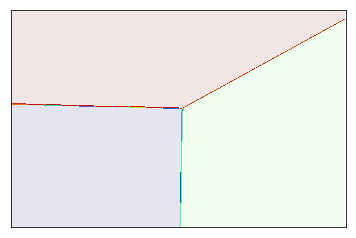

In [10]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
print(np.shape(Z))
# plt.figure(1
# plt.pcolormesh(xx, yy, Z, cmap='jet', alpha = .35)

CS = plt.contourf(xx, yy, Z, 200, cmap='jet', alpha = .1)

# Plot also the training points
# plt.scatter(X[:, 1], X[:, 2], c=Y, edgecolors='k', cmap=plt.cm.Paired)
# plt.xlabel('Sepal length')
# plt.ylabel('Sepal width')

plt.xlim(-2, 11)
plt.ylim(-3, 10)
plt.xticks(())
plt.yticks(())
# plt.axis('equal')
display(X[1:, :], original_label)
plt.savefig('ex1.png', bbox_inches='tight', dpi = 300)
plt.show()